## Import Dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
import seaborn as sns
%matplotlib inline
# chargement du dataset
data = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
# Récupération des features du dataset (58 cols énumérés dans le OnlineNewsPopularity/OnlineNewsPopularity.names)
#features = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)
#display(features.head())
# suppression des espaces sur le devant des colonnes
for col in data.columns: 
    if col[0]==" ":
        data.rename(columns={col:col[1:]}, inplace = True)
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Data-visualisation (utilisez matplotlib, searborn, bokeh…) – montrez le lien entre les variables et la cible

### Analyse des données sur différentes variables du dataset (Title Length, Categories, week day...)

##### Title length

In [55]:
# Relation entre la longueur du titre et le nombre de share
df_no_outliers = data[data["shares"]<=8362]

title_length_df = df_no_outliers.loc[:,["n_tokens_title", "shares"]]  # creating a new dataframe with length of title and number of shares

title_length_df_sorted = title_length_df.sort_values('n_tokens_title') # sorting the dataframe based on the lenght of the titles

distinct_title_keywords_count=(title_length_df_sorted.n_tokens_title.unique()) 

#distinct_title_keywords_count

numOfArticles = {} 

for token in distinct_title_keywords_count: 

    tempDf = title_length_df_sorted[title_length_df_sorted["n_tokens_title"]==token] 

    numOfArticles[token] = len(tempDf.n_tokens_title) 

numOfArticles



{2.0: 1,
 3.0: 5,
 4.0: 27,
 5.0: 170,
 6.0: 756,
 7.0: 1968,
 8.0: 3923,
 9.0: 5813,
 10.0: 6876,
 11.0: 6487,
 12.0: 4943,
 13.0: 3260,
 14.0: 1596,
 15.0: 707,
 16.0: 237,
 17.0: 81,
 18.0: 21,
 19.0: 5,
 20.0: 2,
 23.0: 1}

In [56]:
#2, 3, 4, 17, 18, 19, 20 and 23 ont moins de 100 articles chacuns

#On va donc les supprimer car on peut considérer que cela n'est pas pertinent de les garder

del_indices = [0,1,2,15,16,17,18,19] 

distinct_title_keywords_count = np.delete(distinct_title_keywords_count, del_indices)

In [57]:
# Nous cherchons maintenant la moyenne des shares pour chaque longueur de titre d'article

avg_shares_per_title_length = {}

for row in distinct_title_keywords_count:

    df_tokenwise = title_length_df_sorted[title_length_df_sorted["n_tokens_title"]== row]

    Avg = df_tokenwise["shares"].mean()

    avg_shares_per_title_length[row] = Avg

avg_shares_per_title_length

{5.0: 2216.323529411765,
 6.0: 2028.2843915343915,
 7.0: 2053.901422764228,
 8.0: 1973.700739230181,
 9.0: 1955.0775847238947,
 10.0: 1898.8490401396161,
 11.0: 1919.7316170803144,
 12.0: 1846.2443860004046,
 13.0: 1835.1895705521472,
 14.0: 1864.3659147869673,
 15.0: 1801.2503536067893,
 16.0: 1911.8776371308018}

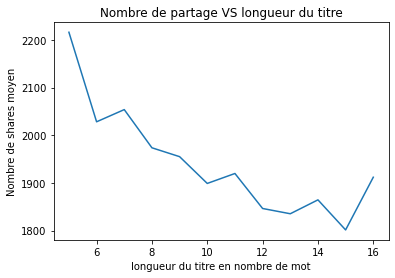

In [58]:
Avg_list =[] 

for token in avg_shares_per_title_length: 

    Avg_list = Avg_list + [avg_shares_per_title_length[token]] 


plt.plot(distinct_title_keywords_count, Avg_list) 

plt.xlabel('longueur du titre en nombre de mot') 

plt.ylabel('Nombre de shares moyen') 

plt.title('Nombre de partage VS longueur du titre') 

plt.show()

##### Article Category (social media, tech, business ...)

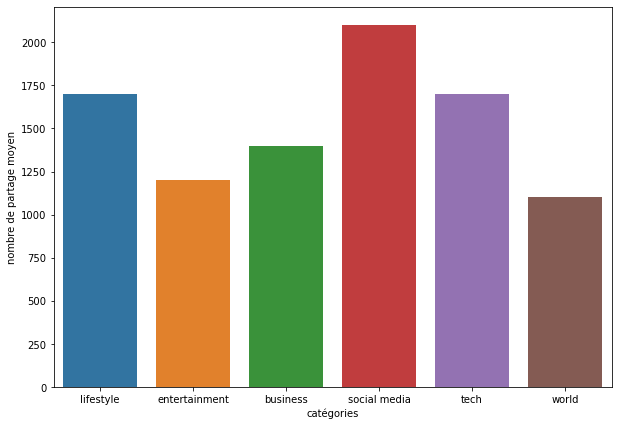

In [70]:
# On va maintenant s'intéresser aux catégories des articles en fonctions de leur nombre de partage moyens

channel = []
for d in ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']:
    channel.append(data[data[d]==1]['shares'].median())

plt.figure(figsize=(10, 7))
ax = sns.barplot(x= ['lifestyle',
       'entertainment', 'business',
       'social media', 'tech',
       'world'], y= channel)
ax.set(xlabel='catégories', ylabel='nombre de partage moyen')
plt.show()

In [ ]:
# on peut voir que les catégories réseaux sociaux, tech et lifestyle sont très partagées

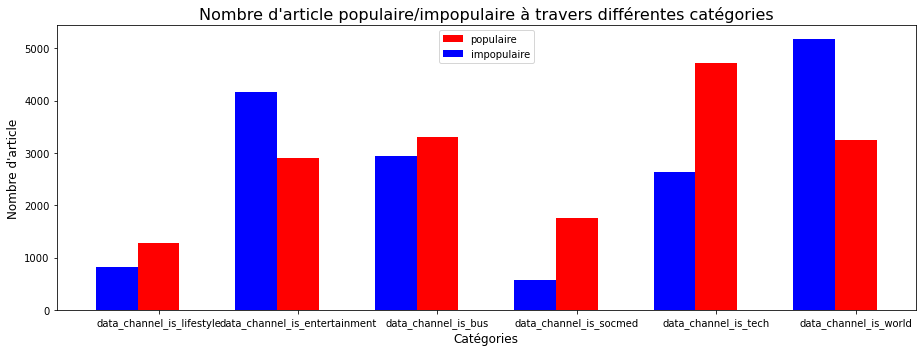

In [67]:
# On peut définir 2 catégories d'articles (populaire/impopulaire)
# Récupération des features du dataset (58 cols énumérés dans le OnlineNewsPopularity/OnlineNewsPopularity.names)
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)

# On définie un treshold de 1400 pour le nombre de share, ce qui nous permet de définir un article "populaire" ou non
# Cette valeur n'a pas été défini par hasard et est donné par la description du dataset ici OnlineNewsPopularity/OnlineNewsPopularity.names
unpop=data[data['shares']<1400]
pop=data[data['shares']>=1400]

columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Nombre d'article populaire/impopulaire à travers différentes catégories", fontsize = 16)
plt.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "populaire")
plt.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "impopulaire")
plt.xticks(np.arange(len(columns_chan)), columns_chan)

plt.ylabel("Nombre d'article", fontsize = 12)
plt.xlabel("Catégories", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()

In [72]:
# on peut voir que les articles tech i reseaux sociaux sont très majoritairement populaire, alors que c'est le contraire pour
# la catégorie world et entertainment

##### Week day

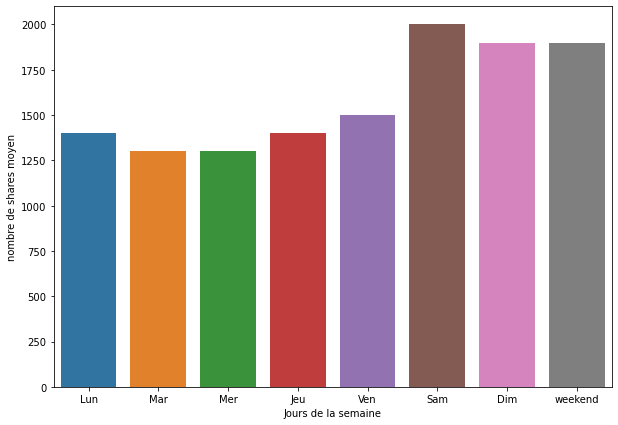

In [59]:
# On va regarder quel est l'impacte des jours de la semaine sur la popularité (nombre moyen de partage) d'un article
shares = []
for d in ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend']:
    shares.append(data[data[d]==1]['shares'].median())
plt.figure(figsize=(10, 7))
# control x and y limits
sns.plt.ylim(0, 20)

ax = sns.barplot(x= ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim', "weekend"], y= shares)
ax.set(xlabel='Jours de la semaine', ylabel='nombre de partage moyen')
plt.show()

In [61]:
# On peut voir grâce à ce plot que les articles parus le weekend sont, de manière générale, plus populaire que ceux parues
# la semaine

## Modélisation – prenez scikit-learnn essayez plusieurs algorithmes, changez les hyper paramètres, faites une grille de recherche, comparez les résultats de vos modèles dans des graphiques